#Project

###Name: Fouzan Asif
###NU-ID: 23K-8054
###Course: DS5004 Machine Learning for Data Science
###Section: MDS-2A

###***Topic: National Museum of Natural History - Dinosaur Fossils Analysis***

Everyone can learn Data - Datacamp Competition (active till 3rd June)

## Imports, Global Variables, and Functions

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier,VotingRegressor, ExtraTreesRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, mean_squared_error,precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances
from scipy.spatial.distance import cdist
from scipy.stats import entropy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow.keras import layers, Model
from sklearn.tree import DecisionTreeClassifier


def transform(data):
  numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
  data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
  categorical_cols = data.select_dtypes(include=[object]).columns.tolist()

  for col in categorical_cols:
      le = LabelEncoder()
      data[col] = le.fit_transform(data[col].astype(str))

  scaler = StandardScaler()
  data = scaler.fit_transform(data)
  return data

def transform_categorical(data,categorical_columns):
  labels = {}
  for col in categorical_columns:
    labels[col] = LabelEncoder()
    data[col] = labels[col].fit_transform(data[col])
  return data, labels

def entropy_calculation(n_clusters):
  entropies = []
  for cluster_label in df['cluster'].unique():
      cluster_data = df[df['cluster'] == cluster_label]
      class_counts = cluster_data['class'].value_counts(normalize=True)
      cluster_entropy = entropy(class_counts)
      entropies.append(cluster_entropy)

  plt.figure(figsize=(8, 5))
  plt.bar(range(n_clusters), entropies, color='blue', alpha=0.7)
  plt.xlabel('Cluster')
  plt.ylabel('Entropy')
  plt.title(f'Entropy of {n_clusters} Clusters')
  plt.xticks(range(n_clusters))
  plt.show()

  for i, entropy_value in enumerate(entropies, 1):
      print(f"Entropy of Cluster {i}: {entropy_value:.4f}")

def purity_calculation(n_clusters):
    purities = []
    for cluster_label in df['cluster'].unique():
        cluster_data = df[df['cluster'] == cluster_label]
        class_counts = df.loc[cluster_data.index]['class'].value_counts()
        max_intersection = class_counts.max()
        total_count = len(cluster_data)
        purity = max_intersection / total_count
        purities.append(purity)

    plt.figure(figsize=(8, 5))
    plt.bar(range(len(purities)), purities, color='green', alpha=0.7)
    plt.xlabel('Cluster')
    plt.ylabel('Purity')
    plt.title(f'Purity of {n_clusters} Clusters')
    plt.xticks(range(len(purities)))
    plt.show()

    for i, purity in enumerate(purities, 1):
        print(f"Purity of Cluster {i}: {purity:.4f}")

def cluster_cohesion(data):
  cohesion_values = []
  for cluster_label in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster_label][['PC1', 'PC2']]
    centroid = cluster_data.mean(axis=0)
    pairwise_dist = pairwise_distances(cluster_data, [centroid], metric='euclidean')
    cohesion = np.mean(pairwise_dist)
    cohesion_values.append(cohesion)

  plt.figure(figsize=(8, 5))

  plt.bar(range(len(cohesion_values)), cohesion_values, color='blue', alpha=0.7)
  plt.xlabel('Cluster')
  plt.ylabel('Cohesion')
  plt.title('Cluster Cohesion')
  plt.xticks(range(len(cohesion_values)))
  plt.show()

  for i, cohesion in enumerate(cohesion_values, 1):
        print(f"Cohesion of Cluster {i}: {cohesion:.4f}")

def cluster_separation(kmeans,n_clusters):
  separation_values = []
  centroids = kmeans.cluster_centers_
  for i in range(n_clusters):
      for j in range(i+1, n_clusters):
          separation = np.linalg.norm(centroids[i] - centroids[j])
          separation_values.append(separation)

  plt.figure(figsize=(12, 6))
  plt.bar(range(len(separation_values)), separation_values, color='green', alpha=0.7)
  plt.xlabel('Cluster Pair')
  plt.ylabel('Separation')
  plt.title('Cluster Separation')
  plt.xticks(range(len(separation_values)), [f'{i}-{j}' for i in range(n_clusters) for j in range(i+1, n_clusters)])

df = pd.read_csv("/content/dinosaurs.csv")
df.drop('occurrence_no', axis = 1, inplace = True)

## 1. Dataset Collection and Description

The dataset was acquired from Datacamp's "Everyone can Learn Data Scholarship" which had 2 challenges:
1. National Museum for Natural History - Dinosaurs Fossil Records
2. Movie Studio Data Analysis (Not yet opened)

The last day to submit a submission is: 3rd June 2024

**National Museum for Natural History - Dinosaurs Fossil Records**

**Objective:** You're applying for a summer internship at the national museum of natural history. The museum recently created a database containing all dinosaur records of past field campaigns. Your job is to dive into the fossil records to find interesting insights, and advise the museum on the quality of the data.

Dinosaurs.csv contains a total of 12 columns given by df.info().
The data contains historical (such as name, class, family), regional (such as lang, lat), and attributional (such as diet, type, length_m, max_ma, min_ma) records of dinosaurs.

Using the dataset, we tend to find useful insights and answer some questions about fossil records of dinosaurs.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      4951 non-null   object 
 1   diet      3596 non-null   object 
 2   type      3596 non-null   object 
 3   length_m  3568 non-null   float64
 4   max_ma    4951 non-null   float64
 5   min_ma    4951 non-null   float64
 6   region    4909 non-null   object 
 7   lng       4951 non-null   float64
 8   lat       4951 non-null   float64
 9   class     4951 non-null   object 
 10  family    3494 non-null   object 
dtypes: float64(5), object(6)
memory usage: 425.6+ KB


Let's see top 5 records of our dataset to peek what our data looks like

In [112]:
df.head()

name         diet            type  length_m  max_ma  min_ma  \
0  Protarchaeopteryx   omnivorous  small theropod       2.0   130.0  122.46   
1        Caudipteryx   omnivorous  small theropod       1.0   130.0  122.46   
2        Gorgosaurus  carnivorous  large theropod       8.6    83.5   70.60   
3        Gorgosaurus  carnivorous  large theropod       8.6    83.5   70.60   
4        Gorgosaurus  carnivorous  large theropod       8.6    83.5   70.60   

     region         lng        lat       class             family  
0  Liaoning  120.733330  41.799999  Saurischia  Archaeopterygidae  
1  Liaoning  120.733330  41.799999  Saurischia    Caudipterygidae  
2   Alberta -111.528732  50.740726  Saurischia    Tyrannosauridae  
3   Alberta -111.549347  50.737015  Saurischia    Tyrannosauridae  
4   Alberta -111.564636  50.723866  Saurischia    Tyrannosauridae

Let's also peek at the range of real-valued columns to see if there exist no potential outliers, and observe the data distribution.

In [68]:
df.describe()

length_m       max_ma       min_ma          lng          lat
count  3568.000000  4951.000000  4951.000000  4951.000000  4951.000000
mean      8.212688   117.518477   106.622270   -37.048675    34.591448
std       6.629887    45.270821    44.395885    84.591106    23.961138
min       0.450000    70.600000    66.000000  -153.247498   -84.333336
25%       3.000000    83.500000    70.600000  -108.258705    36.274439
50%       6.700000    99.600000    89.800000   -96.099998    42.611198
75%      10.000000   155.700000   145.000000    27.383331    47.745138
max      35.000000   252.170000   247.200000   565.000000    78.101875

## 2. Data Pre-processing

### i) Visualizing Null values

Taking null value counts

Null Counts  Null Percentage
name                0         0.000000
diet             1355        27.368208
type             1355        27.368208
length_m         1383        27.933751
max_ma              0         0.000000
min_ma              0         0.000000
region             42         0.848313
lng                 0         0.000000
lat                 0         0.000000
class               0         0.000000
family           1457        29.428398

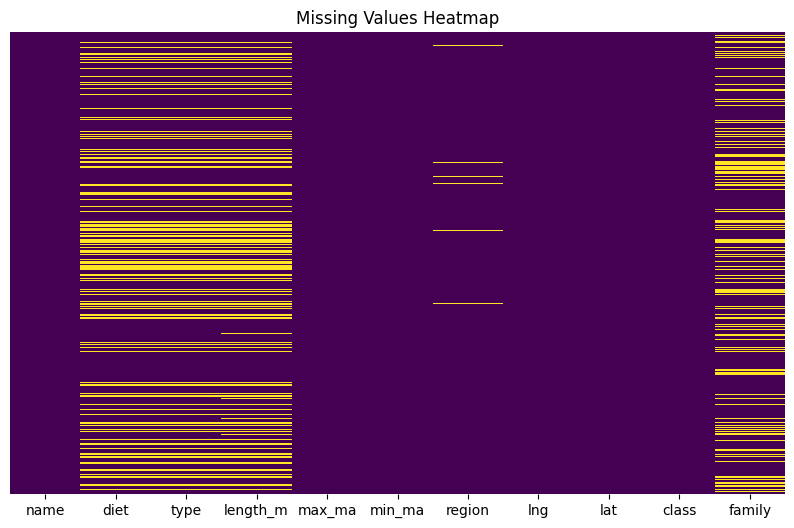

In [69]:
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
null_info = pd.DataFrame({'Null Counts': null_counts, 'Null Percentage': null_percentage})
display(null_info)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [70]:
length_m_nulls = df.groupby('family')['length_m'].apply(lambda x: x.isnull().sum())
length_m_total = df.groupby('family')['length_m'].count()
length_m_nulls = length_m_nulls.sort_values(ascending=False)
length_m_total = length_m_total.sort_values(ascending=False)

print("Family values with the most null values in 'length_m' column:")
display(length_m_nulls.head())
display(length_m_total.head())

Family values with the most null values in 'length_m' column:


family
Dromaeosauridae    48
Ceratopsidae       48
Hadrosauridae      45
Ankylosauridae     34
Troodontidae       26
Name: length_m, dtype: int64

family
Dromaeosauridae    402
Hadrosauridae      274
Ceratopsidae       239
Troodontidae       219
Tyrannosauridae    173
Name: length_m, dtype: int64

### ii) Data Imputation (for handling null values)


A large part of diet, type, and length_m, and family are missing (27% to 29%).
As for diet, type, length_m, most of these null values occur for same samples. Family, however, follows a different trend.

1. We cannot drop samples as we already have less samples
2. We cannot assume common values since its 27% of the data we're talking about and the information can be invalidated.

#### Suitable Solution
1. For Family, use imputation supported by Machine Learning Models with unordinary decision boundaries (probably KNN, Neural Network, or Random Forest)
2. For length_m, use Linear Regression over family and existing length_m attribute (as we see no more than 48 null values exists vs the amount of data per family is quite sufficient to train a good Linear Regression model).
3. For diet and type, use model on type of family, lang, lat, length_m

#### **Imputing Region Attribute**

In [71]:
most_frequent_region = df['region'].mode()[0]
df['region'].fillna(most_frequent_region, inplace=True)

#### **Imputing "Family" Attribute**

In [72]:
columns_to_drop = ['length_m', 'diet', 'type']
data = df.drop(columns_to_drop, axis=1)

categorical_columns = ['name', 'class','region']
data, label_encoders = transform_categorical(data,categorical_columns)

X_train = data.dropna().drop('family', axis=1)
y_train = data.dropna()['family']

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

X_test = data[data['family'].isnull()].drop('family', axis=1)
imputed_family = rf_classifier.predict(X_test)
data.loc[data['family'].isnull(), 'family'] = imputed_family
for col in categorical_columns:
    data[col] = label_encoders[col].inverse_transform(data[col])

print(f"Missing values count of family: {df['family'].isnull().sum()}")

df['family'] = data['family']

print(f"Missing values count of family: {df['family'].isnull().sum()}")

Missing values count of family: 1457
Missing values count of family: 0


#### **Imputing length_m using Linear Regression**

In [73]:
print("Before imputation")
df.describe()['length_m']

columns_to_drop = ['diet', 'type','name']
data = df.copy()
df = df.drop(columns_to_drop, axis=1)

label_encoders = {}
categorical_columns = ['family', 'region']
df, label_encoders = transform_categorical(data,categorical_columns)

df_missing = df[df['length_m'].isnull()]
indices_with_null = df_missing.index
for idx in indices_with_null:
    print("Index:", idx)
    print("Family:", df.loc[idx, 'family'])
    print("Region:", df.loc[idx, 'region'])
    print("Longitude:", df.loc[idx, 'lng'])
    print("Latitude:", df.loc[idx, 'lat'])
    print("Imputed Length (m):", df.loc[idx, 'length_m'])
    print()
    break # for 1 index but I'll prefer keeping the loop in case of checking
df_complete = df.dropna(subset=['length_m'])

X_train = df_complete[['family', 'region', 'lng', 'lat']]
y_train = df_complete['length_m']

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

X_test = df_missing[['family', 'region', 'lng', 'lat']]
imputed_length_m = lr_model.predict(X_test)

df.loc[df['length_m'].isnull(), 'length_m'] = imputed_length_m

for col in categorical_columns:
    df[col] = label_encoders[col].inverse_transform(df[col])

df[columns_to_drop] = data[columns_to_drop]

Before imputation
Index: 22
Family: 73
Region: 178
Longitude: -107.966393
Latitude: 36.06028
Imputed Length (m): nan



In [74]:
## SHow lasso and ridge

In [75]:
# Length_m after imputation
df.describe()['length_m']

for idx in indices_with_null:
    print("Index:", idx)
    print("Family:", df.loc[idx, 'family'])
    print("Region:", df.loc[idx, 'region'])
    print("Longitude:", df.loc[idx, 'lng'])
    print("Latitude:", df.loc[idx, 'lat'])
    print("Imputed Length (m):", df.loc[idx, 'length_m'])
    print()
    break

Index: 22
Family: Tyrannosauridae
Region: New Mexico
Longitude: -107.966393
Latitude: 36.06028
Imputed Length (m): 7.200812734598763



#### **Imputing "Diet" and "Type" attributes**

In [76]:
dropped_columns = ['class','max_ma','min_ma','name']
data = df.copy()
df = df.drop(dropped_columns, axis=1)

label_encoders = {}
categorical_columns = ['family', 'region']
df, label_encoders = transform_categorical(df,categorical_columns)


df_missing_diet = df[df['diet'].isnull()]
df_complete_diet = df.dropna(subset=['diet'])

X_train_diet = df_complete_diet.drop(['diet', 'type'], axis=1)
y_train_diet = df_complete_diet['diet']

knn_imputer_diet = KNNImputer(n_neighbors=5)
knn_imputer_diet.fit(X_train_diet)

X_test_diet = df_missing_diet.drop(['diet', 'type'], axis=1)
imputed_diet = knn_imputer_diet.transform(X_test_diet)

df.loc[df['diet'].isnull(), 'diet'] = imputed_diet[:, 0]

df_missing_type = df[df['type'].isnull()]
df_complete_type = df.dropna(subset=['type'])

X_train_type = df_complete_type.drop(['diet', 'type'], axis=1)
y_train_type = df_complete_type['type']

knn_imputer_type = KNNImputer(n_neighbors=5)
knn_imputer_type.fit(X_train_type)

X_test_type = df_missing_type.drop(['diet', 'type'], axis=1)
imputed_type = knn_imputer_type.transform(X_test_type)

df.loc[df['type'].isnull(), 'type'] = imputed_type[:, 1]

for col in categorical_columns:
    df[col] = label_encoders[col].inverse_transform(df[col])

df[dropped_columns] = data[dropped_columns]

### iii) Increasing size of Dataset

To do this, I had multiple choices:
1. Use GAN or VAE to augment fake samples that look real. However it was time taking, and the data generated was scaled and could not be converted back to labels with whatever knowledge I had.
2. Use Bootstrapping for random sampling
3. Use STOME, an oversampling technique (but I had a few classes with 1,2 samples so oversampling was throwing an error)

So I have used Bootstrapping

In [77]:
desired_size = 12000
current_size = len(df)
additional_samples_needed = desired_size - current_size

bootstrapped_samples = df.sample(n=additional_samples_needed, replace=True, random_state=42)
bootstrapped_df = pd.concat([df, bootstrapped_samples])

display(bootstrapped_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 0 to 1055
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diet      12000 non-null  object 
 1   type      12000 non-null  object 
 2   length_m  12000 non-null  float64
 3   region    12000 non-null  object 
 4   lng       12000 non-null  float64
 5   lat       12000 non-null  float64
 6   family    12000 non-null  object 
 7   class     12000 non-null  object 
 8   max_ma    12000 non-null  float64
 9   min_ma    12000 non-null  float64
 10  name      12000 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.1+ MB


None

## 3. Data Visualization

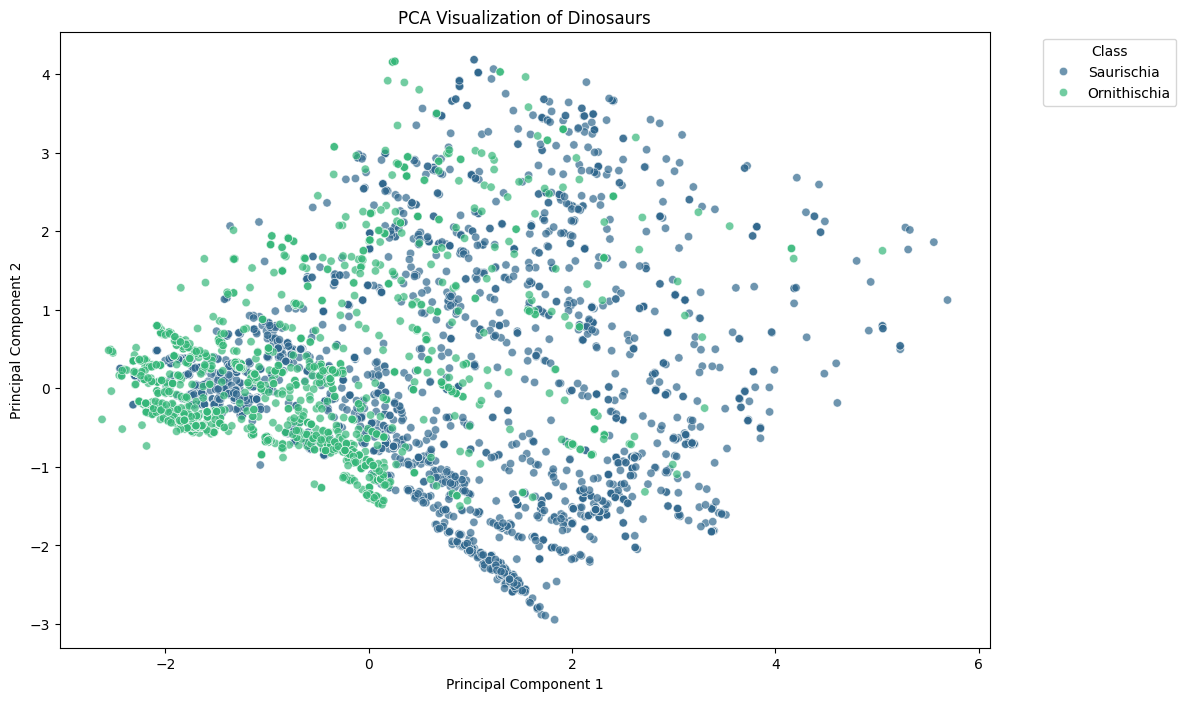

In [78]:
df_pca = transform(df.copy())
df_pca = np.delete(df_pca, -1, axis=1)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

principal_df['class'] = df['class']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=principal_df, palette='viridis', alpha=0.7)
plt.title('PCA Visualization of Dinosaurs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [79]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_pca)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

principal_df['class'] = df['class']

fig = px.scatter_3d(principal_df, x='PC1', y='PC2', z='PC3', color='class',
                     title='3D PCA Visualization of Dinosaurs',
                     labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                     color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

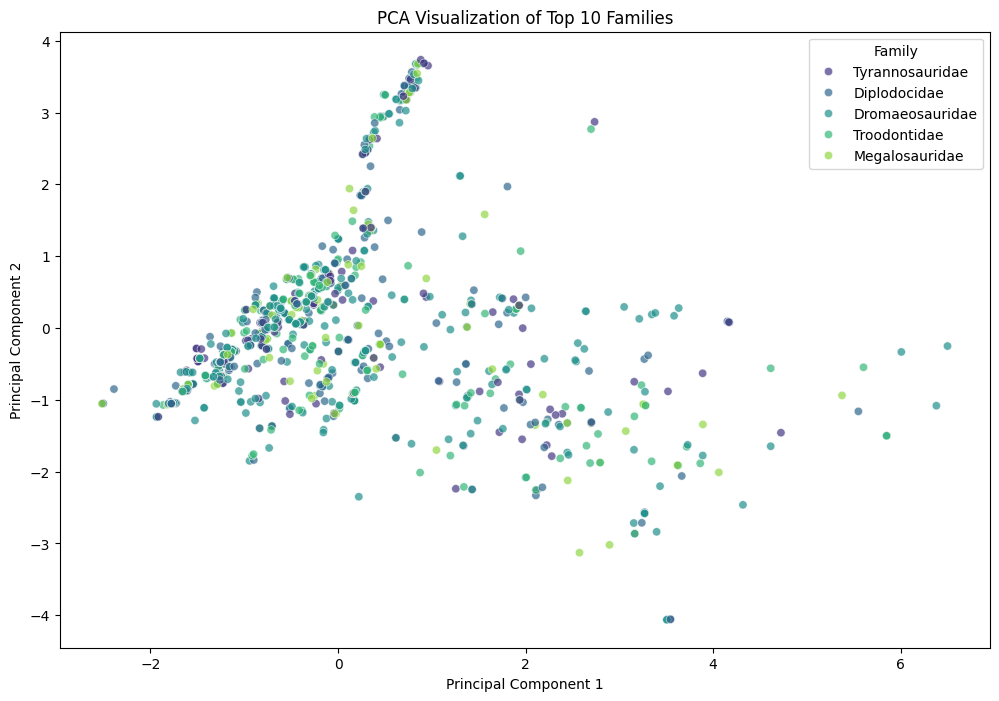

In [80]:
top_10_families = df['family'].value_counts(ascending=False).head(10).index
df_top_10 = df[df['family'].isin(top_10_families)]

df_pca = transform(df_top_10.copy())
df_pca = np.delete(df_pca, -1, axis=1)
df_pca = np.delete(df_pca, -1, axis=1)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

principal_df['family'] = df_top_10['family']

# Plot the PCA visualization for the top 10 families
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='family', data=principal_df, palette='viridis', alpha=0.7)
plt.title('PCA Visualization of Top 10 Families')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Family')
plt.show()


In [113]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_pca)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

principal_df['family'] = df['family']

fig = px.scatter_3d(principal_df, x='PC1', y='PC2', z='PC3', color='family',
                     title='3D PCA Visualization of Dinosaurs',
                     labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                     color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

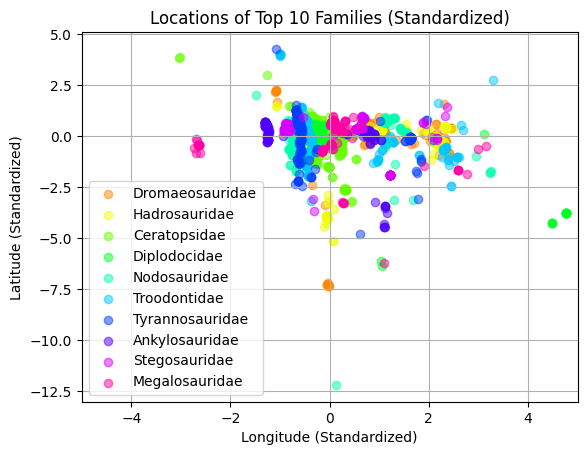

In [82]:
from sklearn.preprocessing import StandardScaler

filtered_df = df.dropna(subset=['family'])
family_counts = filtered_df['family'].value_counts()

family_counts = family_counts.sort_values(ascending=False)
top_10_families = family_counts.head(10)
family_locations = {}

for i, family in enumerate(top_10_families.index):
    family_locations[family] = filtered_df.loc[filtered_df['family'] == family, ['lat', 'lng']]
    scaler = StandardScaler()
    family_locations[family][['lat', 'lng']] = scaler.fit_transform(family_locations[family][['lat', 'lng']])
    color = sns.color_palette('hsv', 10)[i]  # Adjust 'hsv' to other palettes if needed
    plt.scatter(
        family_locations[family]['lng'],
        family_locations[family]['lat'],
        label=family,
        alpha=0.5,
        color=color
    )

plt.xlabel('Longitude (Standardized)')
plt.ylabel('Latitude (Standardized)')
plt.title('Locations of Top 10 Families (Standardized)')
plt.legend()
plt.xlim(-5, 5)
plt.grid(True)
plt.show()

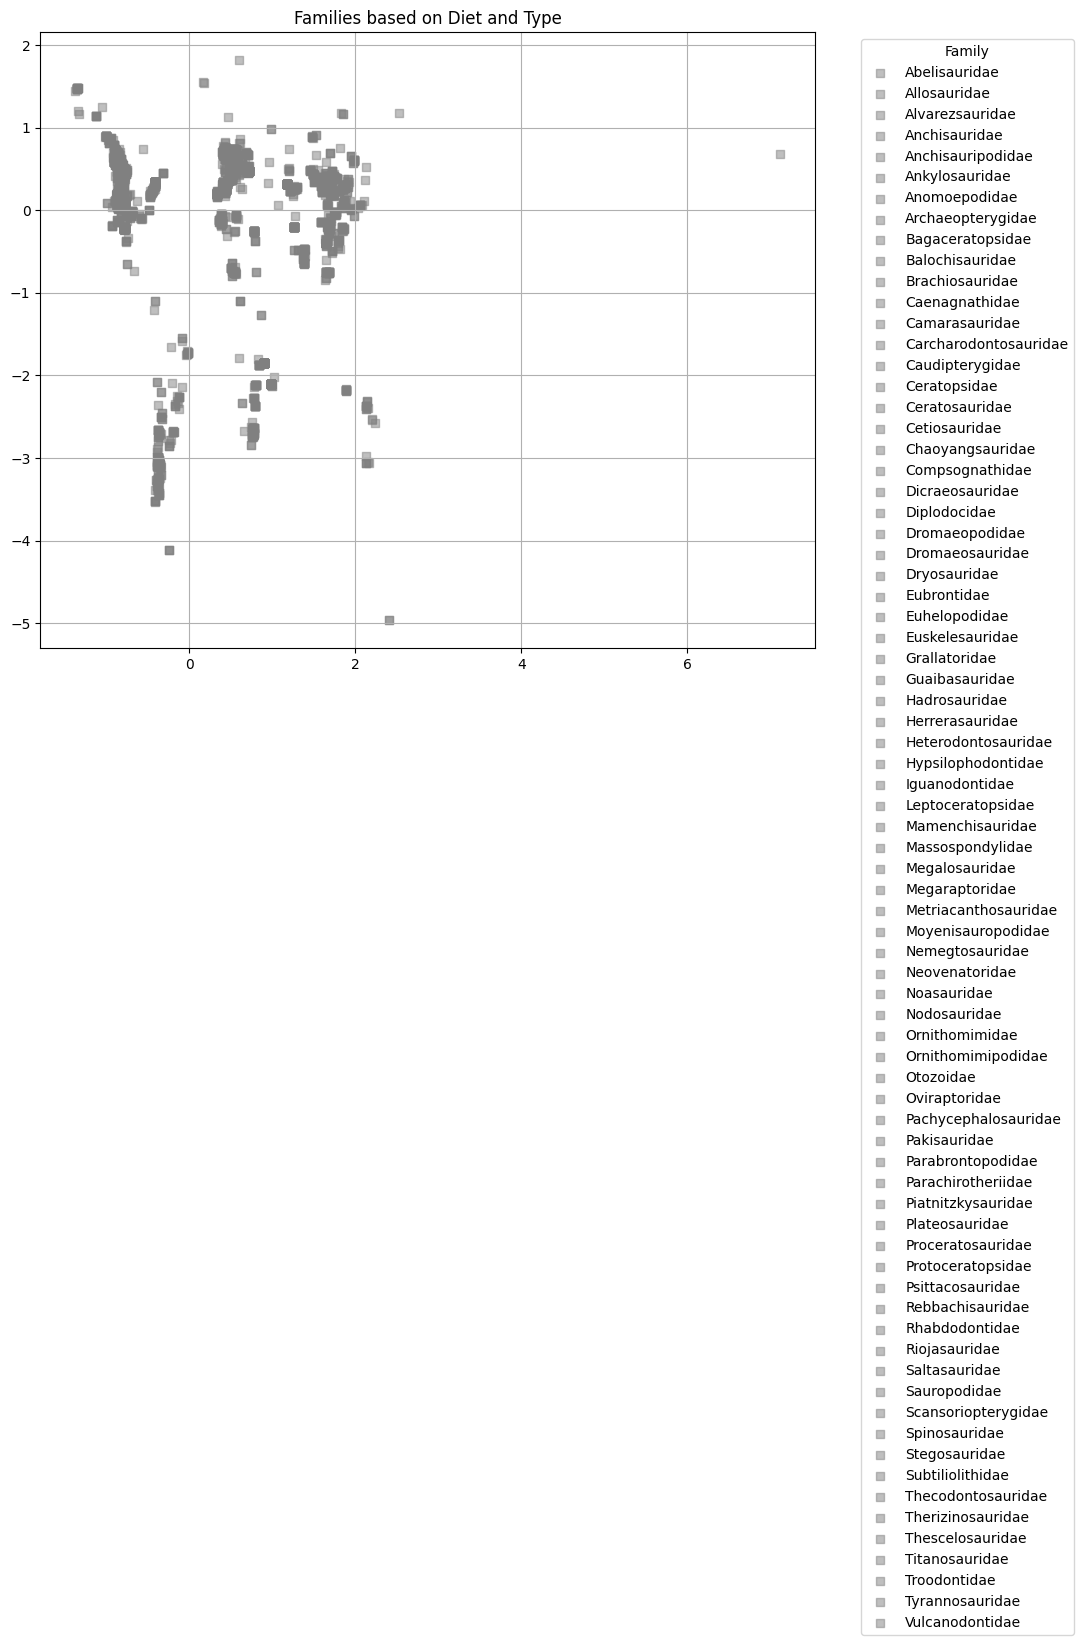

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df.dropna(subset=['family'])
scaler = StandardScaler()
filtered_df[['lat', 'lng']] = scaler.fit_transform(filtered_df[['lat', 'lng']])
diet_colors = {'herbivore': 'green', 'carnivore': 'red', 'omnivore': 'blue'}
type_markers = {'reptile': 's', 'mammal': 'o', 'bird': '^'}

plt.figure(figsize=(10, 8))
for family, data in filtered_df.groupby('family'):
    diet_color = diet_colors.get(data['diet'].iloc[0], 'gray')  # Use gray for unknown diet
    type_marker = type_markers.get(data['type'].iloc[0], 's')   # Use square marker for unknown type
    plt.scatter(data['lng'], data['lat'], label=family, c=diet_color, marker=type_marker, alpha=0.5)


plt.title('Families based on Diet and Type')
plt.legend(title='Family', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


#### **Selecting the correct attributes**

Selecting the correct attributes for modelling is very important. For this purpose, we'll use correlation map. However, correlation may not necessarily show causation relationships, but is still considered by almost all machine learning models while deriving the relationships (especially Naive Bayes).

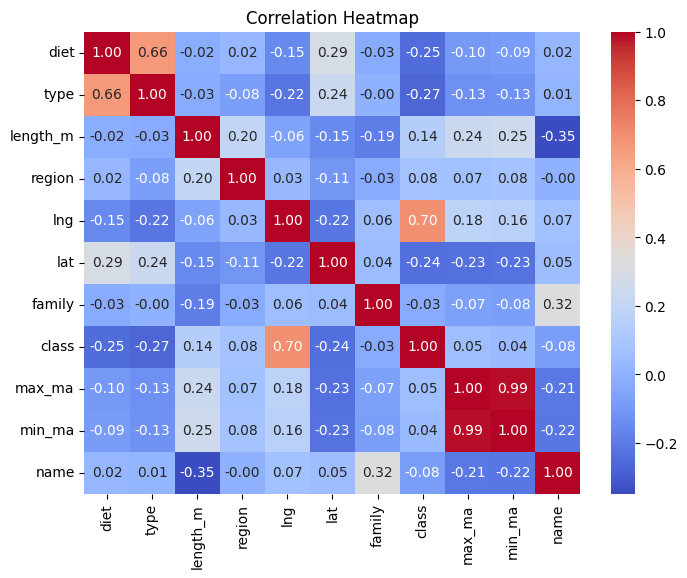

In [ ]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Models  MSE Longitude  MSE Latitude
0              Linear Regression       0.493033      0.819934
1        Random Forest Regressor       0.136841      0.206360
2    Gradient Boosting Regressor       0.230342      0.354996
3       Support Vector Regressor       0.379624      0.643114
4  k-Nearest Neighbors Regressor       0.204674      0.283744

## 4. Cluster Validity Analysis and Clustering

The purpose of this section is to validate that "class" attribute and see if we have the rightful distribution of classes of dinosaurs according to their fossils.

Clustering is one way to find if the number of groups according to data is ideal. Sine the data is archeological and no one lived with dinosaurs, every classification can be mistaken. Thus, in this section, we will validate if we have the right groups of dinosaurs.

###a) Clustering visualization

We'll simply remove the "Class" attribute and identify if we get correct number of clusters.


                name         diet            type  length_m  max_ma  min_ma  \
0  Protarchaeopteryx   omnivorous  small theropod       2.0   130.0  122.46   
1        Caudipteryx   omnivorous  small theropod       1.0   130.0  122.46   
2        Gorgosaurus  carnivorous  large theropod       8.6    83.5   70.60   
3        Gorgosaurus  carnivorous  large theropod       8.6    83.5   70.60   
4        Gorgosaurus  carnivorous  large theropod       8.6    83.5   70.60   

     region         lng        lat       class             family  
0  Liaoning  120.733330  41.799999  Saurischia  Archaeopterygidae  
1  Liaoning  120.733330  41.799999  Saurischia    Caudipterygidae  
2   Alberta -111.528732  50.740726  Saurischia    Tyrannosauridae  
3   Alberta -111.549347  50.737015  Saurischia    Tyrannosauridae  
4   Alberta -111.564636  50.723866  Saurischia    Tyrannosauridae  


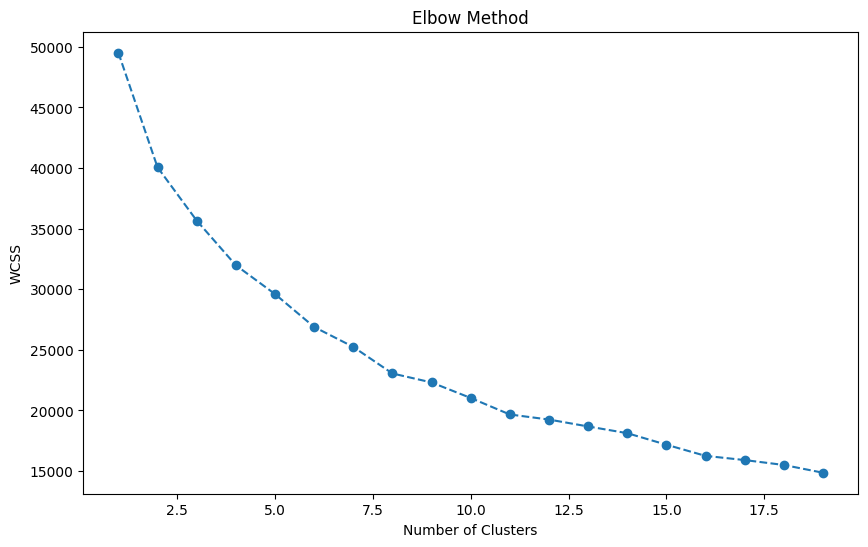

In [140]:
df_cluster = transform(df.copy())
print(df.head())
df_cluster = np.delete(df_cluster, -4, axis=1) #Removing class attribute

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42,n_init='auto')
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### b) Entropy, Purity, Cohesion, Separation using 2 classes
(since we had 2 classes)

In [141]:
n_clusters = 2 #Since according to our data, we have this many classes
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(df_cluster)

dff = pd.DataFrame(
    {
        "class_name": [1,0,'Saurischia','Ornithischia'],
        "counts": [df[df['cluster'] == 1]['cluster'].value_counts()[1],df[df['cluster'] == 0]['cluster'].value_counts()[0],
                   df[df['class'] == 'Saurischia']['class'].value_counts()[0], df[df['class'] == 'Ornithischia']['class'].value_counts()[0]]
    }
)
display(dff)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



class_name  counts
0             1    1947
1             0    3004
2    Saurischia    3074
3  Ornithischia    1877

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



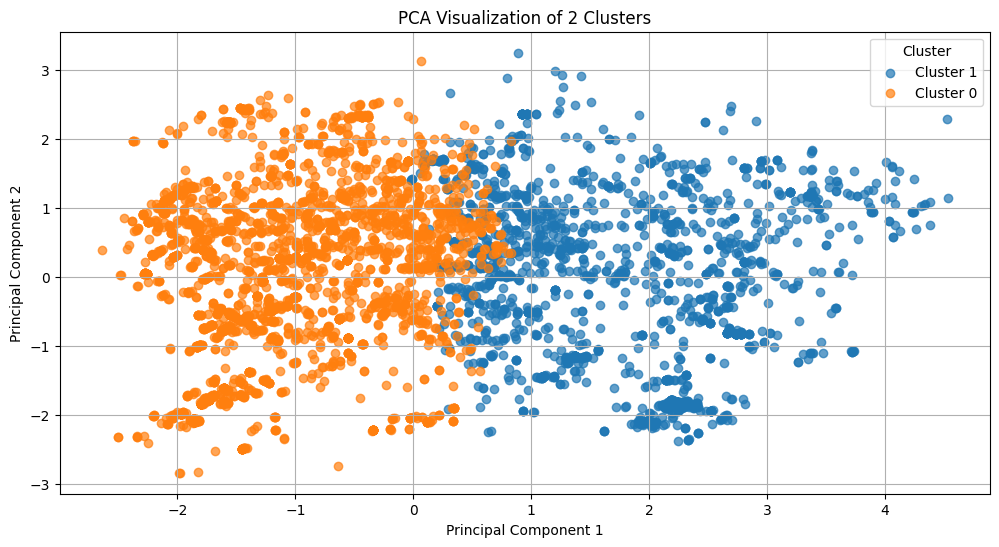

In [142]:
df_scaled = transform(df)
df_scaled = np.delete(df_scaled, -1, axis=1) #Removing class attribute
df_scaled = np.delete(df_scaled, -1, axis=1) #Removing class attribute

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca_final = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca_final['cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(12, 6))

for cluster_label in df_pca_final['cluster'].unique():
    subset = df_pca_final[df_pca_final['cluster'] == cluster_label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.title('PCA Visualization of 2 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [143]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_pca)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

principal_df['cluster'] = df['cluster']

fig = px.scatter_3d(principal_df, x='PC1', y='PC2', z='PC3', color='cluster',
                     title='3D PCA Visualization of Dinosaurs',
                     labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                     color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

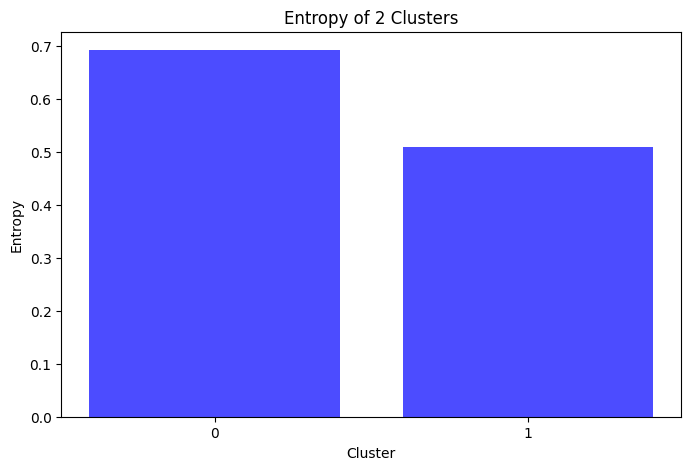

Entropy of Cluster 1: 0.6930
Entropy of Cluster 2: 0.5092


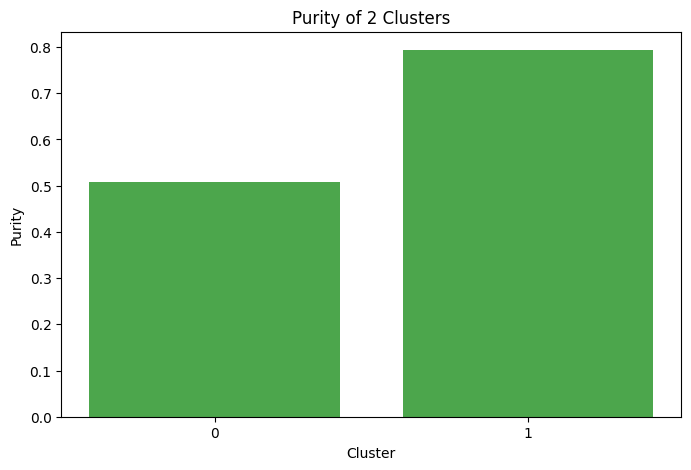

Purity of Cluster 1: 0.5090
Purity of Cluster 2: 0.7935


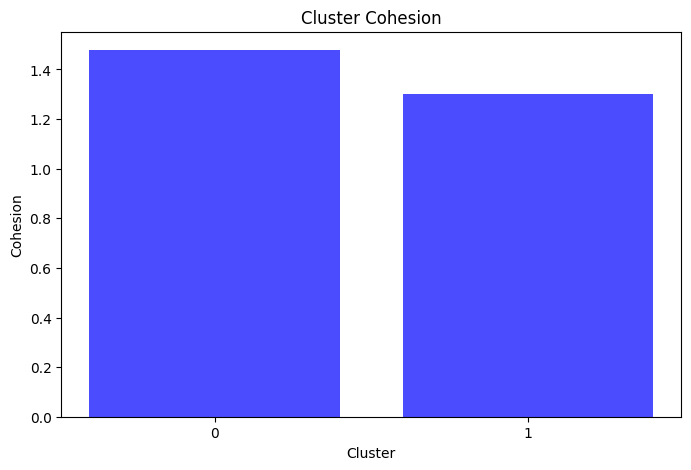

Cohesion of Cluster 1: 1.4784
Cohesion of Cluster 2: 1.3027


In [144]:
entropy_calculation(n_clusters=2)
purity_calculation(n_clusters = 2)
cluster_cohesion(df_pca_final)

In [145]:
# cluster_separation(kmeans,2)

centroids = []
for cluster_label in df_pca_final['cluster'].unique():
    centroid = df_pca_final[df_pca_final['cluster'] == cluster_label][['PC1', 'PC2']].mean()
    centroids.append(centroid.values)

separation_values = []
for i in range(len(centroids)):
    for j in range(i+1, len(centroids)):
        separation = np.linalg.norm(centroids[i] - centroids[j])
        separation_values.append(separation)

for i, separation_value in enumerate(separation_values):
    print(f"Separation between Cluster Pair {i+1}: {separation_value:.4f}")

Separation between Cluster Pair 1: 2.8057


### c) Entropy, Purity, Cohesion, Separation for 5 classes

In [146]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(df_cluster)
dff = pd.DataFrame(
    {
        "class_name": [0,1,2,3,4,'Saurischia','Ornithischia'],
        "counts": [df[df['cluster'] == 0]['cluster'].value_counts(),
                   df[df['cluster'] == 1]['cluster'].value_counts(),
                   df[df['cluster'] == 2]['cluster'].value_counts(),
                   df[df['cluster'] == 3]['cluster'].value_counts(),
                   df[df['cluster'] == 4]['cluster'].value_counts(),
                   df[df['class'] == 'Saurischia']['class'].value_counts(), df[df['class'] == 'Ornithischia']['class'].value_counts()]
    }
)
display(dff)

class_name                                       counts
0             0   cluster
0    583
Name: count, dtype: int64
1             1  cluster
1    1104
Name: count, dtype: int64
2             2   cluster
2    873
Name: count, dtype: int64
3             3   cluster
3    604
Name: count, dtype: int64
4             4  cluster
4    1787
Name: count, dtype: int64
5    Saurischia        Series([], Name: count, dtype: int64)
6  Ornithischia        Series([], Name: count, dtype: int64)

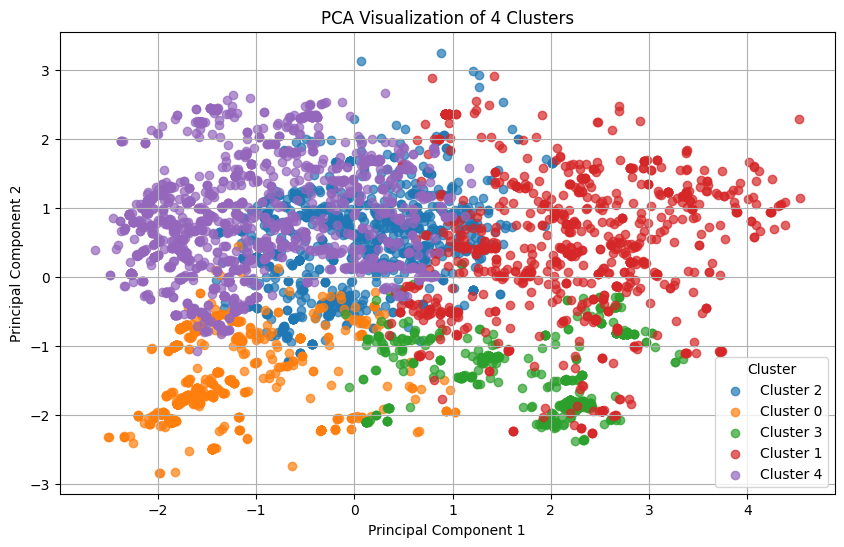

In [147]:
df_scaled = transform(df.copy())
df_scaled = np.delete(df_scaled, -1, axis=1) #Removing cluster attribute
df_scaled = np.delete(df_scaled, -1, axis=1) #Removing class attribute

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca_final = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca_final['cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(10, 6))

for cluster_label in df_pca_final['cluster'].unique():
    subset = df_pca_final[df_pca_final['cluster'] == cluster_label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.title('PCA Visualization of 4 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [148]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_pca)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

principal_df['cluster'] = df['cluster']

fig = px.scatter_3d(principal_df, x='PC1', y='PC2', z='PC3', color='cluster',
                     title='3D PCA Visualization of Dinosaurs',
                     labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                     color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

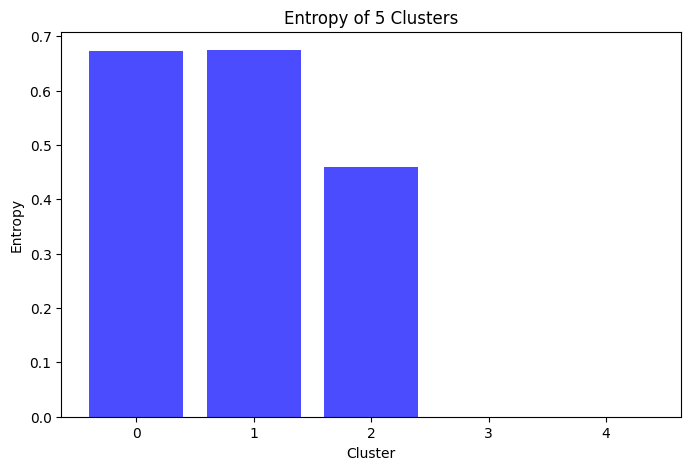

Entropy of Cluster 1: 0.6737
Entropy of Cluster 2: 0.6746
Entropy of Cluster 3: 0.4588
Entropy of Cluster 4: 0.0000
Entropy of Cluster 5: 0.0000


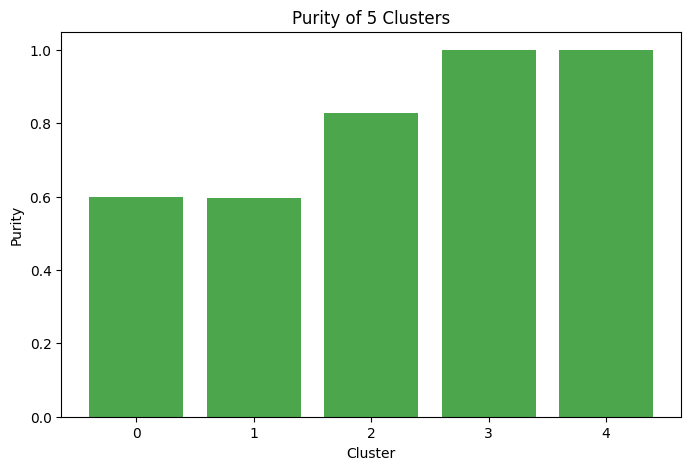

Purity of Cluster 1: 0.5982
Purity of Cluster 2: 0.5960
Purity of Cluster 3: 0.8282
Purity of Cluster 4: 1.0000
Purity of Cluster 5: 1.0000


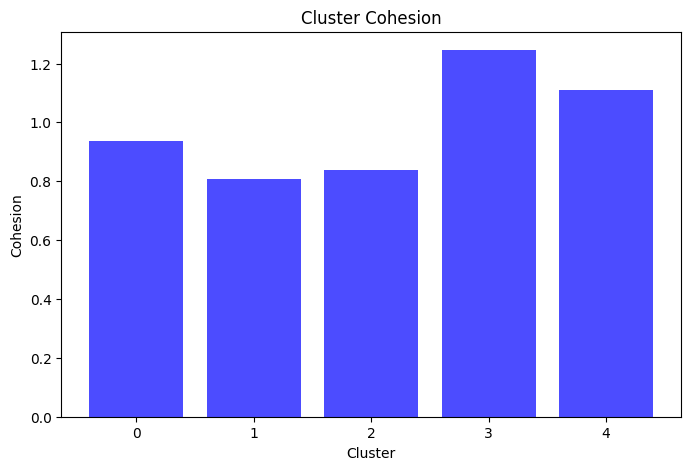

Cohesion of Cluster 1: 0.9372
Cohesion of Cluster 2: 0.8089
Cohesion of Cluster 3: 0.8378
Cohesion of Cluster 4: 1.2457
Cohesion of Cluster 5: 1.1112


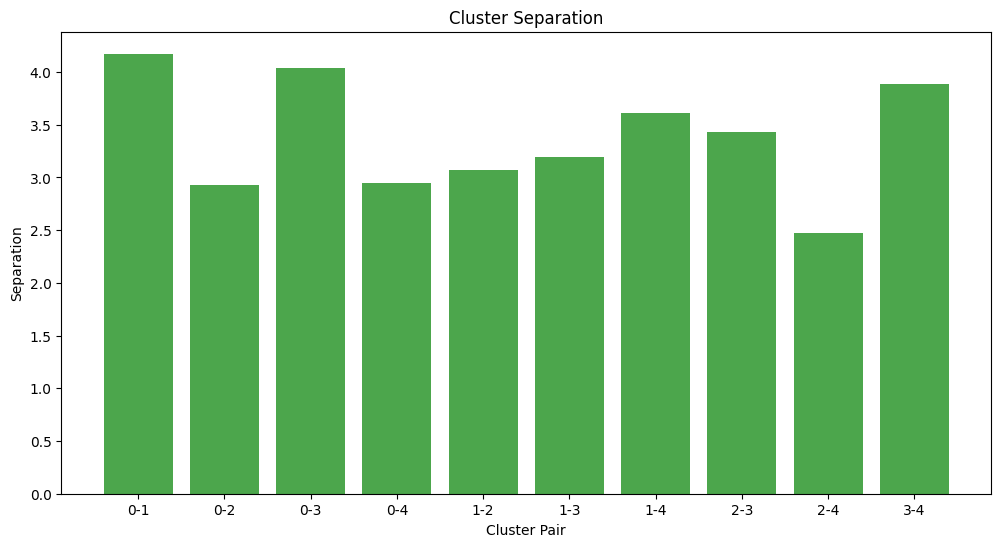

In [149]:
entropy_calculation(n_clusters)
purity_calculation(n_clusters)
cluster_cohesion(df_pca_final)
cluster_separation(kmeans,n_clusters)

### Replacing classes with clusters

In [150]:
df['class'] = df['cluster']
df.drop('cluster',axis=1,inplace=True)

## Scenario 2: Consuming entire dataset to identify dinosaur groups

### a) Visualization

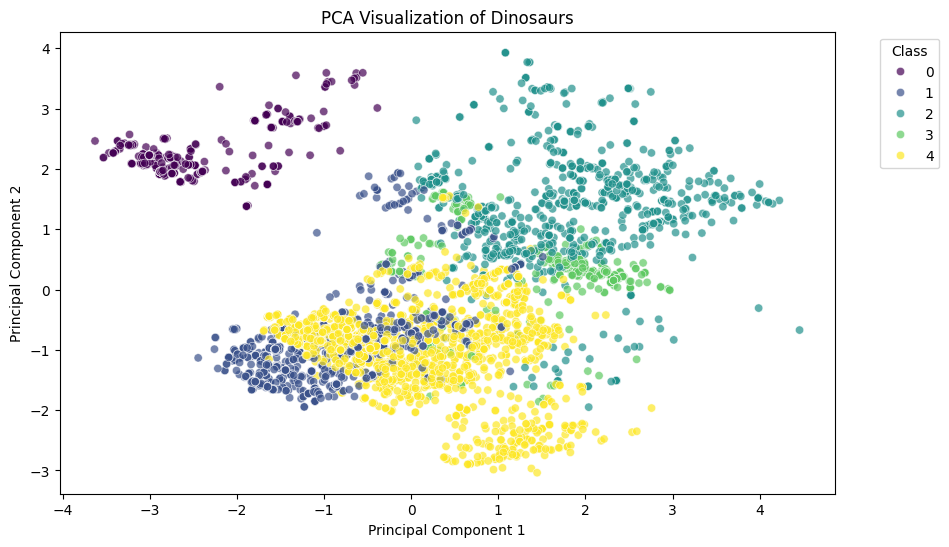

In [172]:
df_pca = transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

principal_df['class'] = df['class']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=principal_df, palette='viridis', alpha=0.7)
plt.title('PCA Visualization of Dinosaurs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [173]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_pca)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

principal_df['class'] = df['class']

fig = px.scatter_3d(principal_df, x='PC1', y='PC2', z='PC3', color='class',
                     title='3D PCA Visualization of Dinosaurs',
                     labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                     color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

### b) Clustering

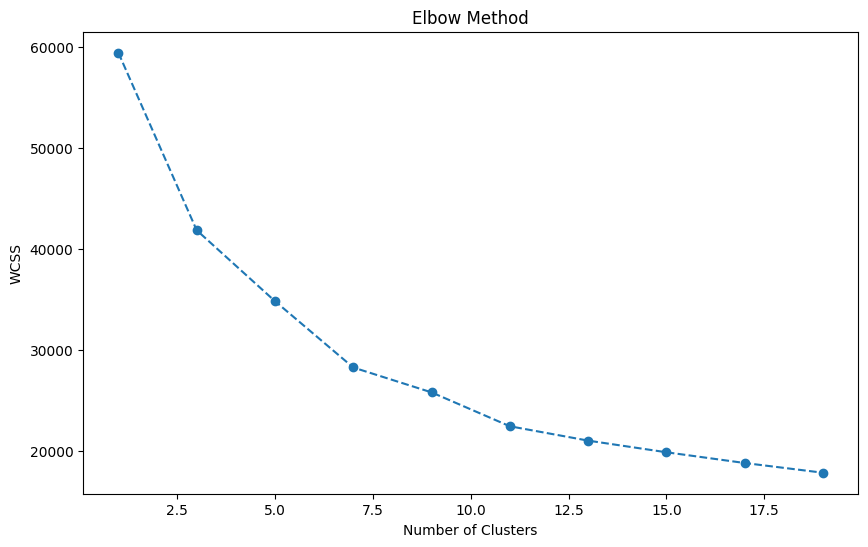

In [174]:
df_cluster = transform(df)

wcss = []
for i in range(1, 20, 2):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42,n_init='auto')
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20,2), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

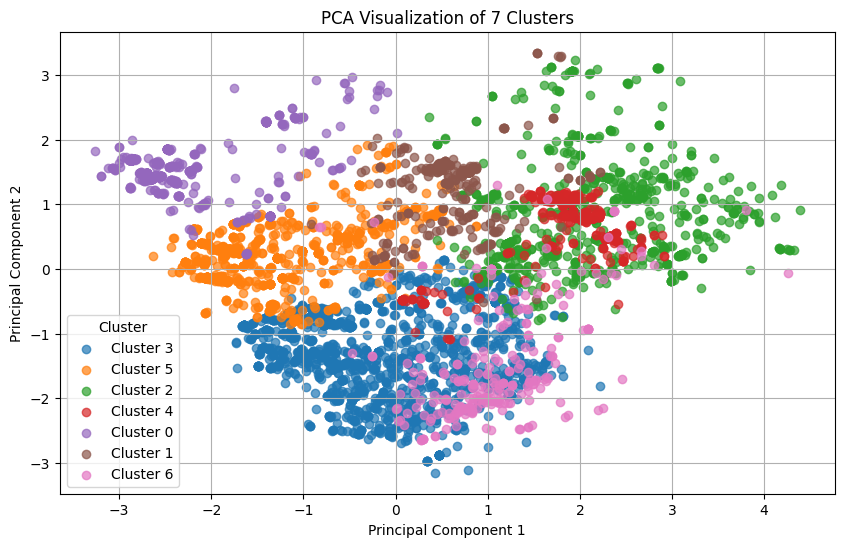

In [175]:
n_clusters = 7 # Identified using Elbow method
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(df_cluster)

df_scaled = transform(df)
df_scaled = np.delete(df_scaled, -1, axis=1) #Removing cluster attribute

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca_final = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca_final['cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(10, 6))

for cluster_label in df_pca_final['cluster'].unique():
    subset = df_pca_final[df_pca_final['cluster'] == cluster_label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster_label}', alpha=0.7)

plt.title(f'PCA Visualization of {n_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [176]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_pca)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

principal_df['cluster'] = df['cluster']

fig = px.scatter_3d(principal_df, x='PC1', y='PC2', z='PC3', color='cluster',
                     title='3D PCA Visualization of Dinosaurs',
                     labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                     color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

### c) Entropy, Purity, Cohesion, Separation

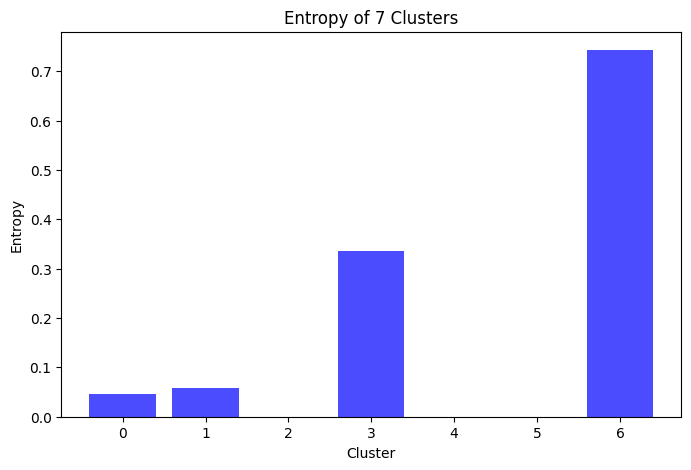

Entropy of Cluster 1: 0.0464
Entropy of Cluster 2: 0.0585
Entropy of Cluster 3: 0.0000
Entropy of Cluster 4: 0.3360
Entropy of Cluster 5: 0.0000
Entropy of Cluster 6: 0.0000
Entropy of Cluster 7: 0.7429


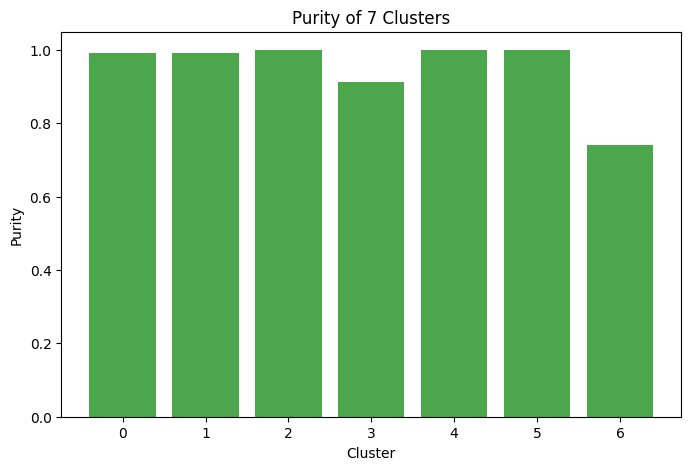

Purity of Cluster 1: 0.9925
Purity of Cluster 2: 0.9915
Purity of Cluster 3: 1.0000
Purity of Cluster 4: 0.9142
Purity of Cluster 5: 1.0000
Purity of Cluster 6: 1.0000
Purity of Cluster 7: 0.7422


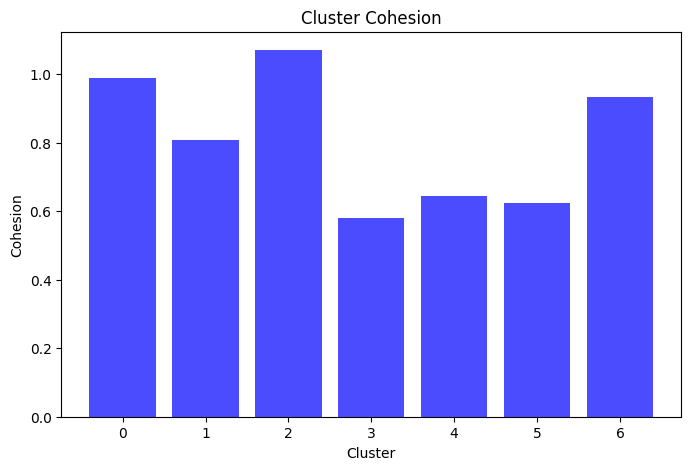

Cohesion of Cluster 1: 0.9875
Cohesion of Cluster 2: 0.8078
Cohesion of Cluster 3: 1.0697
Cohesion of Cluster 4: 0.5790
Cohesion of Cluster 5: 0.6436
Cohesion of Cluster 6: 0.6235
Cohesion of Cluster 7: 0.9317


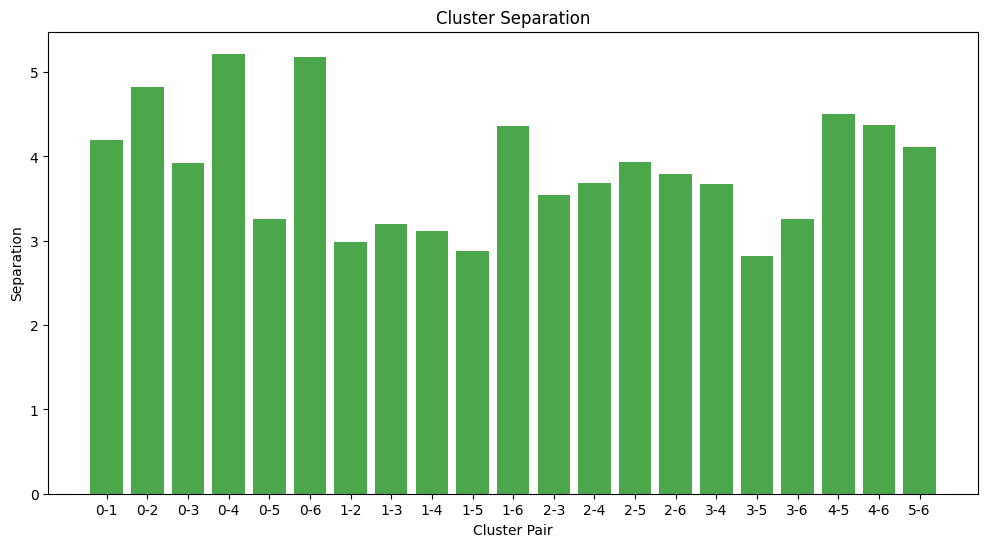

In [177]:
entropy_calculation(n_clusters)
purity_calculation(n_clusters)
cluster_cohesion(df_pca_final)
cluster_separation(kmeans,n_clusters)

## 5. Modelling

Let's first pick some questions to answer:

1. Diet Prediction: Predict the diet (e.g., herbivore, carnivore, omnivore) of a dinosaur based on other attributes such as length, type, and family?

2. Geographical Distribution Analysis: How does the geographical distribution of dinosaur fossils vary across different regions? Identify regions with higher concentrations of fossil occurrences?

3. Body Size Estimation: Model accurately estimate the length or size of a dinosaur based on attributes like family, type, and region?

4. Family Classification: Classify dinosaur fossils into different families based on their attributes such as length, type, and region

5. Type Classification: Create a model that identifies different types of dinosaurs

6. Class prediction (New 5 classes)

Before that, the most important point to answer is: Which model to choose and why?

#### **Finding combination of good models**

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



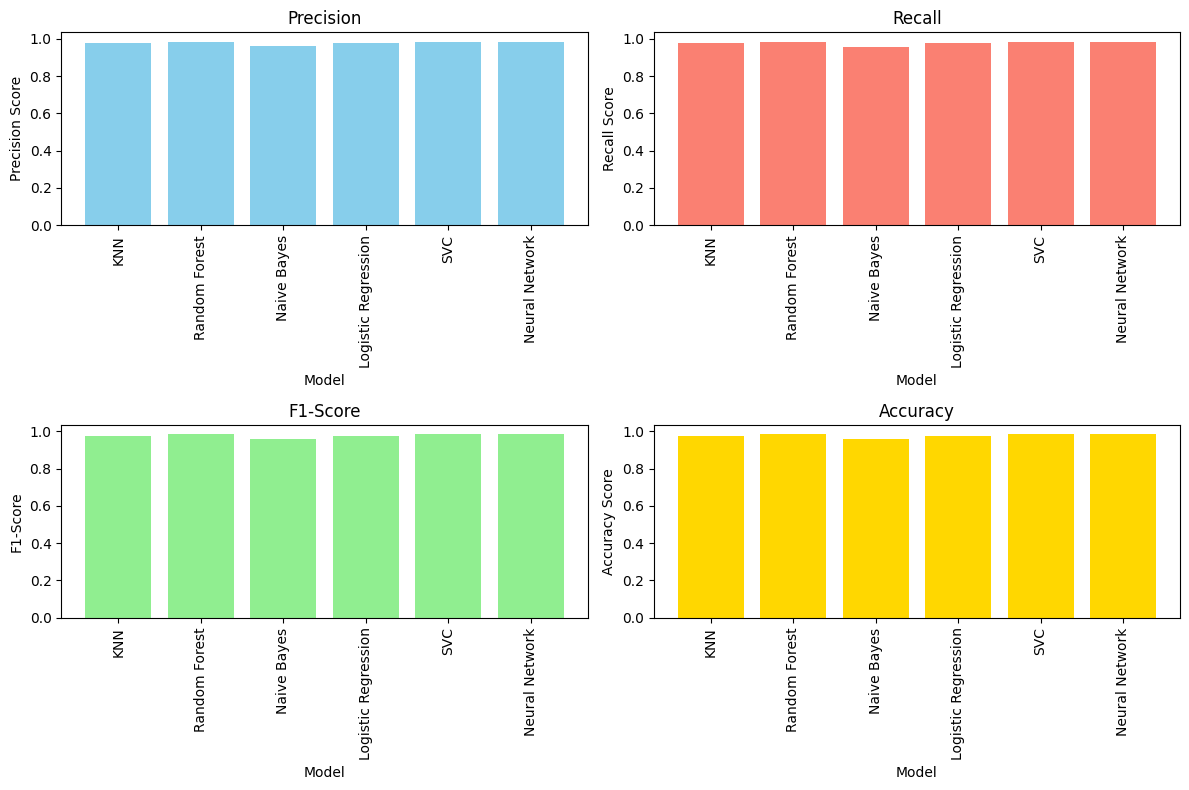

Precision    Recall  F1-Score  Accuracy
KNN                   0.977006  0.976791  0.976836  0.976791
Random Forest         0.983945  0.983855  0.983857  0.983855
Naive Bayes           0.958970  0.957619  0.957776  0.957619
Logistic Regression   0.976909  0.976791  0.976825  0.976791
SVC                   0.983024  0.982846  0.982888  0.982846
Neural Network        0.985206  0.984864  0.984900  0.984864

In [152]:
X = df.drop(['class', 'name'], axis=1)
X = X.dropna()

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(probability=True),
    "Neural Network": MLPClassifier()
}

precision_scores = {}
recall_scores = {}
f1_scores = {}
accuracy = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')
    accuracy[name] = accuracy_score(y_test, y_pred)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(precision_scores.keys(), precision_scores.values(), color='skyblue')
plt.title('Precision')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Precision Score')

plt.subplot(2, 2, 2)
plt.bar(recall_scores.keys(), recall_scores.values(), color='salmon')
plt.title('Recall')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Recall Score')

plt.subplot(2, 2, 3)
plt.bar(f1_scores.keys(), f1_scores.values(), color='lightgreen')
plt.title('F1-Score')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('F1-Score')

plt.subplot(2, 2, 4)
plt.bar(accuracy.keys(), accuracy.values(), color='gold')
plt.title('Accuracy')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')

plt.tight_layout()
plt.show()

scores = pd.DataFrame({
    "Precision":precision_scores,
    "Recall":recall_scores,
    "F1-Score":f1_scores,
    "Accuracy":accuracy
})
display(scores)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-p

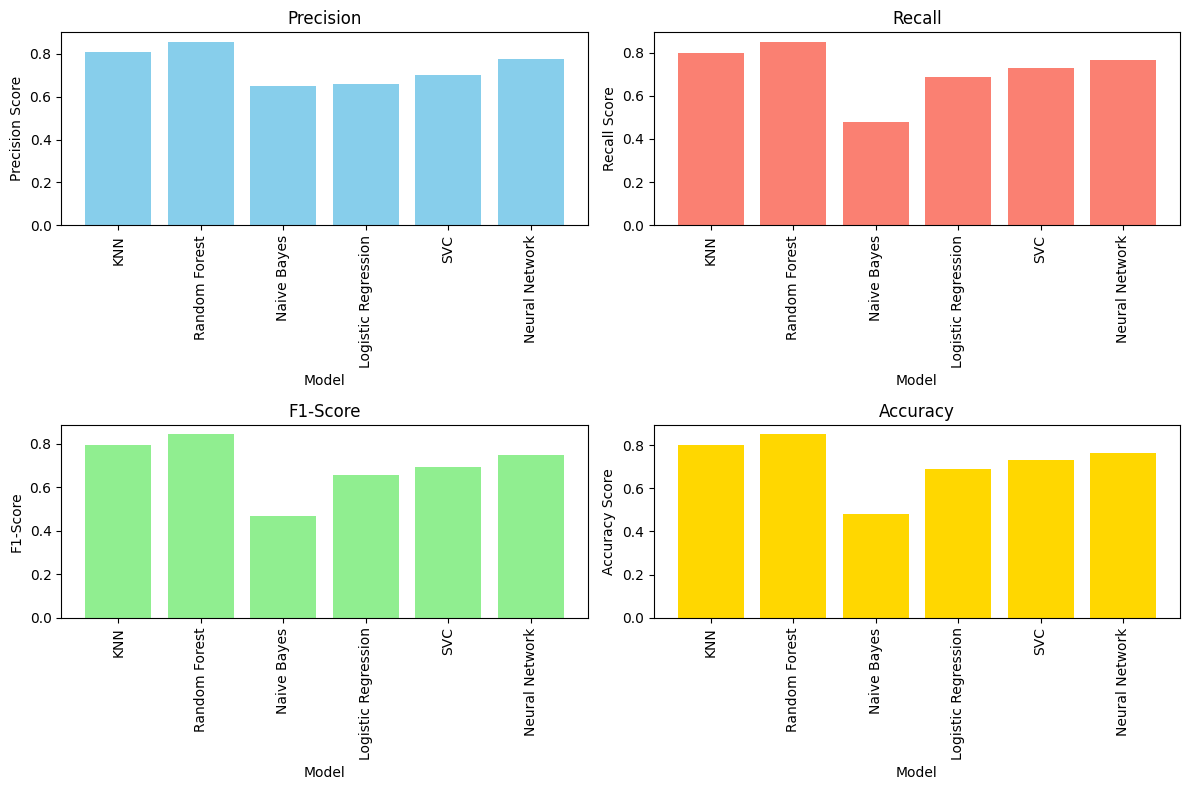

Precision    Recall  F1-Score  Accuracy
KNN                   0.806750  0.800202  0.794026  0.800202
Random Forest         0.857979  0.851665  0.845603  0.851665
Naive Bayes           0.648826  0.479314  0.468437  0.479314
Logistic Regression   0.658056  0.688194  0.659110  0.688194
SVC                   0.700605  0.729566  0.695793  0.729566
Neural Network        0.774897  0.764884  0.749819  0.764884

In [153]:
X = df.drop(['family', 'name'], axis=1)
X = X.dropna()

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df['family']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(probability=True),
    "Neural Network": MLPClassifier()
}

precision_scores = {}
recall_scores = {}
f1_scores = {}
accuracy = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')
    accuracy[name] = accuracy_score(y_test, y_pred)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(precision_scores.keys(), precision_scores.values(), color='skyblue')
plt.title('Precision')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Precision Score')

plt.subplot(2, 2, 2)
plt.bar(recall_scores.keys(), recall_scores.values(), color='salmon')
plt.title('Recall')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Recall Score')

plt.subplot(2, 2, 3)
plt.bar(f1_scores.keys(), f1_scores.values(), color='lightgreen')
plt.title('F1-Score')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('F1-Score')

plt.subplot(2, 2, 4)
plt.bar(accuracy.keys(), accuracy.values(), color='gold')
plt.title('Accuracy')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')

plt.tight_layout()
plt.show()

scores = pd.DataFrame({
    "Precision":precision_scores,
    "Recall":recall_scores,
    "F1-Score":f1_scores,
    "Accuracy":accuracy
})
display(scores)

In [154]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

X = df.drop(columns=['lng', 'lat', 'region','name','family'])
Y = df[['lng','lat']]
scaler = StandardScaler()
Y = scaler.fit_transform(Y)
y_lng = Y[:,0]
y_lat = Y[:,1]

# y_lng = df['lng']
# y_lat = df['lat']
y_region = df['region']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_lng_train, y_lng_test, y_lat_train, y_lat_test, y_region_train, y_region_test = train_test_split(
    X, y_lng, y_lat, y_region, test_size=0.2, random_state=42)

regressors = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('Support Vector Regressor', SVR()),
    ('k-Nearest Neighbors Regressor', KNeighborsRegressor())
]

MSEs = {}

for name, regressor in regressors:
    model = regressor
    model.fit(X_train, y_lng_train)
    y_pred = model.predict(X_test)
    mse1 = mean_squared_error(y_lng_test, y_pred)

    model.fit(X_train, y_lat_train)
    y_pred = model.predict(X_test)
    mse2 = mean_squared_error(y_lat_test, y_pred)
    MSEs[name] = [mse1,mse2]

values = [[x,MSEs[x][0],MSEs[x][1]] for x in MSEs.keys()]
data = pd.DataFrame(values,columns=["Models","MSE Longitude", "MSE Latitude"])
display(data)



Models  MSE Longitude  MSE Latitude
0              Linear Regression       0.938532      0.890386
1        Random Forest Regressor       0.386889      0.454425
2    Gradient Boosting Regressor       0.531717      0.597956
3       Support Vector Regressor       0.795400      0.869126
4  k-Nearest Neighbors Regressor       0.422673      0.486455

#### **Random Forest and its performance**

Based on attributes, Random Forest and KNNs are able to capture a much more accurate decision boundary than other ML algorithms. Let's try using Random Forest to answer our questions

In [155]:
diet_df = df[['length_m', 'type', 'family', 'diet']].dropna()
X_diet = diet_df[['length_m', 'type', 'family']]
y_diet = diet_df['diet']
X_diet_train, X_diet_test, y_diet_train, y_diet_test = train_test_split(X_diet, y_diet, test_size=0.3, random_state=42)
diet_model = RandomForestClassifier()
diet_model.fit(X_diet_train, y_diet_train)
diet_pred = diet_model.predict(X_diet_test)
diet_accuracy = accuracy_score(y_diet_test, diet_pred)
print("Diet Prediction Accuracy:", diet_accuracy)

geo_df = df[['region', 'lat', 'lng']].dropna()
X_geo = geo_df[['lat', 'lng']]
y_geo = geo_df['region']
X_geo_train, X_geo_test, y_geo_train, y_geo_test = train_test_split(X_geo, y_geo, test_size=0.3, random_state=42)
geo_model = RandomForestClassifier()
geo_model.fit(X_geo_train, y_geo_train)
geo_pred = geo_model.predict(X_geo_test)
geo_accuracy = accuracy_score(y_geo_test, geo_pred)
print("Geographical Distribution Analysis Accuracy:", geo_accuracy)

size_df = df[['length_m', 'type', 'family', 'max_ma', 'min_ma']].dropna()
X_size = size_df[['length_m', 'max_ma', 'min_ma','family','type']]
y_size = size_df['type']  # Using 'type' as target for regression
X_size_train, X_size_test, y_size_train, y_size_test = train_test_split(X_size, y_size, test_size=0.3, random_state=42)
size_model = RandomForestRegressor()
size_model.fit(X_size_train, y_size_train)
size_pred = size_model.predict(X_size_test)
size_mse = mean_squared_error(y_size_test, size_pred)
print("Body Size Estimation Mean Squared Error:", size_mse)

family_df = df[['length_m', 'type', 'region', 'family']].dropna()
X_family = family_df[['length_m', 'type', 'region']]
y_family = family_df['family']
X_family_train, X_family_test, y_family_train, y_family_test = train_test_split(X_family, y_family, test_size=0.3, random_state=42)
family_model = RandomForestClassifier()
family_model.fit(X_family_train, y_family_train)
family_pred = family_model.predict(X_family_test)
family_accuracy = accuracy_score(y_family_test, family_pred)
print("Family Classification Accuracy:", family_accuracy)

type_df = df[['length_m', 'region', 'lat', 'lng', 'type']].dropna()
X_type = type_df[['length_m', 'lat', 'lng']]
y_type = type_df['type']
X_type_train, X_type_test, y_type_train, y_type_test = train_test_split(X_type, y_type, test_size=0.3, random_state=42)
type_model = RandomForestClassifier()
type_model.fit(X_type_train, y_type_train)
type_pred = type_model.predict(X_type_test)
type_accuracy = accuracy_score(y_type_test, type_pred)
print("Type Prediction Accuracy:", type_accuracy)

Diet Prediction Accuracy: 0.9966352624495289
Geographical Distribution Analysis Accuracy: 0.9347240915208613
Body Size Estimation Mean Squared Error: 0.0
Family Classification Accuracy: 0.8021534320323015
Type Prediction Accuracy: 0.8970390309555855


#### **Models using Cross Validation**

In [156]:
X = df.drop(['family', 'name'], axis=1)
X = X.dropna()

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df['family']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
names = []
accuracies = []
scores = []
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    names.append(name)
    scores.append(cv_scores.mean())
    print(f"{name} CV Scores: {cv_scores}")
    print(f"{name} Mean CV Accuracy: {cv_scores.mean()}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(test_accuracy)
    print(f"{name} Test Accuracy: {test_accuracy}\n")

dff = pd.DataFrame()
dff["Model"] = names
dff["Accuracy"] = accuracies
dff["CV Scores"] = scores

display(dff)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Random Forest CV Scores: [0.81836529 0.83131313 0.77373737 0.81717172 0.78686869]
Random Forest Mean CV Accuracy: 0.8054912393358407
Random Forest Test Accuracy: 0.8496468213925328



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the d

Logistic Regression CV Scores: [0.6518668  0.67676768 0.69090909 0.66666667 0.65252525]
Logistic Regression Mean CV Accuracy: 0.667747097615917


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Logistic Regression Test Accuracy: 0.6881937436932392

K-Nearest Neighbors CV Scores: [0.73763875 0.7989899  0.74141414 0.75151515 0.71717172]
K-Nearest Neighbors Mean CV Accuracy: 0.7493459315659113
K-Nearest Neighbors Test Accuracy: 0.8002018163471241



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Support Vector Machine CV Scores: [0.68415742 0.72222222 0.73737374 0.72020202 0.70707071]
Support Vector Machine Mean CV Accuracy: 0.7142052207238887
Support Vector Machine Test Accuracy: 0.7295660948536832



Model  Accuracy  CV Scores
0           Random Forest  0.849647   0.805491
1     Logistic Regression  0.688194   0.667747
2     K-Nearest Neighbors  0.800202   0.749346
3  Support Vector Machine  0.729566   0.714205

## 6. Ensembled Learning

In this section, we'll perform 4 activities:
1. Using heterogenous ensembled learning to acquire generalized and robust model
2. Using heterogenous ensembled learning to predict based on multiple models i.e. Predict lng and lat from one model, and predict region based on predicted lng lat and compare accuracy.
3. Using Boosting
4. Using bagging
5. Using Stacking

#### **Simple Ensembled Learing**

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/

MLP Classifier Performance:
	Accuracy: 0.6852
	Precision: 0.7010
	Recall: 0.6852
	F1-Score: 0.6758
------------------------------
K-Nearest Neighbors Performance:
	Accuracy: 0.6862
	Precision: 0.6946
	Recall: 0.6862
	F1-Score: 0.6767
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Support Vector Machine Performance:
	Accuracy: 0.3623
	Precision: 0.1831
	Recall: 0.3623
	F1-Score: 0.2231
------------------------------
Decision Tree Performance:
	Accuracy: 0.8163
	Precision: 0.8352
	Recall: 0.8163
	F1-Score: 0.8192
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Random Forest Performance:
	Accuracy: 0.8496
	Precision: 0.8529
	Recall: 0.8496
	F1-Score: 0.8438
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Ensemble Performance:
	Accuracy: 0.8244
	Precision: 0.8350
	Recall: 0.8244
	F1-Score: 0.8169


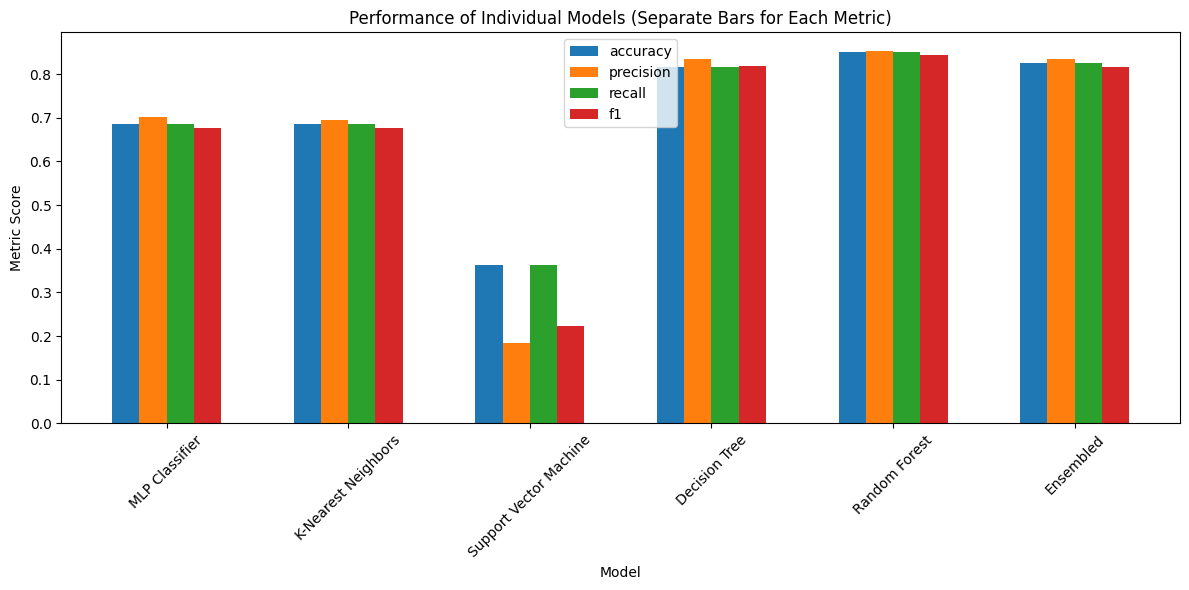

In [157]:
X = df.drop(["family","name"], axis=1)
y = df["family"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_metrics = {}
ensemble_metrics = {}
for name, model in base_estimators:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    model_metrics[name] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

    print(f"{name} Performance:")
    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tPrecision: {precision:.4f}")
    print(f"\tRecall: {recall:.4f}")
    print(f"\tF1-Score: {f1:.4f}")
    print("-" * 30)

ensemble = VotingClassifier(estimators=base_estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

ensemble_metrics = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

print(f"Ensemble Performance:")
print(f"\tAccuracy: {accuracy:.4f}")
print(f"\tPrecision: {precision:.4f}")
print(f"\tRecall: {recall:.4f}")
print(f"\tF1-Score: {f1:.4f}")

model_names = [name for name, _ in base_estimators]
metrics = ["accuracy", "precision", "recall", "f1"]
metric_values = []

for name, metrics_dict in model_metrics.items():
    metric_values.append([metrics_dict[metric] for metric in metrics])

metric_values.append([ensemble_metrics[metric] for metric in metrics])


plt.figure(figsize=(12, 6))
model_names.append("Ensembled")
num_models = len(model_names)
x = np.arange(num_models)
width = 0.15
offset = list(range(len(metrics)))

for i, metric in enumerate(metrics):
    plt.bar(x + offset[i] * width, [row[i] for row in metric_values], width, label=metric)

plt.xlabel("Model")
plt.ylabel("Metric Score")
plt.title("Performance of Individual Models (Separate Bars for Each Metric)")
plt.xticks(x + (len(metrics) - 1) * width / 2, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### **Heterogeneous Stacking Ensembled using Different Splits of Data by Cross Validation**

In [158]:
X = df.drop(["family","name"], axis=1)
y = df["family"]

base_estimators = [
    ("MLP Classifier", MLPClassifier(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Support Vector Machine", SVC(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_predictions = []
model_accuracies = {}
for train_index, val_index in skf.split(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X.iloc[train_index], y.iloc[train_index], test_size=0.2, random_state=42)

    for name, model in base_estimators:
        model.fit(X_train, y_train)
    base_preds = [model.predict(X_val) for name, model in base_estimators]

    X_val_stacked = np.hstack(base_preds)

    ensemble = VotingClassifier(estimators=base_estimators)
    ensemble.fit(X.iloc[train_index], y.iloc[train_index])

    val_preds = ensemble.predict(X_val)
    cv_predictions.append(val_preds)

    for i, (name, _) in enumerate(base_estimators):
        model_accuracy = accuracy_score(y_val, base_preds[i])
        model_accuracies.setdefault(name, []).append(model_accuracy)

y_pred_stacked = np.concatenate(cv_predictions)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
accuracy = accuracy_score(y_test, ensemble.predict(X_test))
print("Accuracy of Stacking ensemble (family prediction):", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the opti

Accuracy of Stacking ensemble (family prediction): 0.9081735620585267


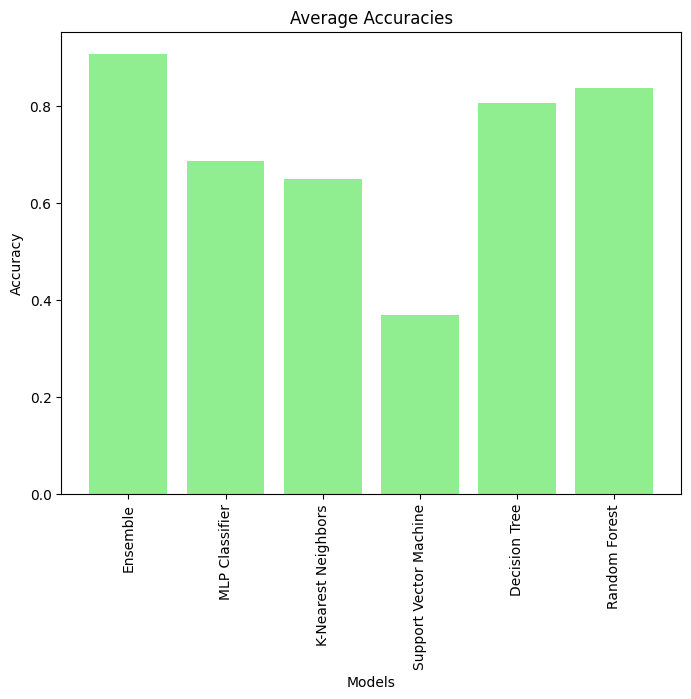

In [159]:
average_accuracy = [accuracy]
names = ["Ensemble"]
for name, accuracies in model_accuracies.items():
    average_accuracy.append(sum(accuracies) / len(accuracies))
    names.append(name)

plt.figure(figsize=(8, 6))
plt.bar(names, average_accuracy, color='lightgreen')
plt.title('Average Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()


#### **Heterogenous Ensemble to predict Region based on predicted Longitude and Latitude by another Ensemble**

In [160]:
data = df.copy()

X = data.drop(["lat","lng","name","family", "region"], axis=1)
y_lng = data["lng"]
y_lat = data["lat"]
y_region = data["region"]

X_train, X_test, _, _, _, _ = train_test_split(X, y_lng, y_lat, test_size=0.2, random_state=42)
lng_regressors = [
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Linear Regression", LinearRegression()),
    ("Extra Trees Regressor", ExtraTreesRegressor(n_estimators=100, random_state=42))
]
lng_ensemble = VotingRegressor(estimators=lng_regressors)
lng_ensemble.fit(X, y_lng)
predicted_lng = lng_ensemble.predict(X)

lat_regressors = [
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Linear Regression", LinearRegression()),
    ("Extra Trees Regressor", ExtraTreesRegressor(n_estimators=100, random_state=42))
]

lat_ensemble = VotingRegressor(estimators=lat_regressors)
lat_ensemble.fit(X, y_lat)

predicted_lat = lat_ensemble.fit(X, y_lat).predict(X)
predicted_location = pd.DataFrame({"predicted_lng": predicted_lng, "predicted_lat": predicted_lat})
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(predicted_location, y_region)
y_pred_region = clf.predict(predicted_location.iloc[len(X_train):])
accuracy = accuracy_score(y_region.iloc[len(X_train):], y_pred_region)  # Calculate accuracy on testing set

print("Mean Squared Error (lng prediction):", mean_squared_error(y_lng, predicted_lng))
print("Mean Squared Error (lat prediction):", mean_squared_error(y_lat, predicted_lat))
print("Accuracy of region prediction (ensemble):", accuracy)

Mean Squared Error (lng prediction): 2192.1259217368865
Mean Squared Error (lat prediction): 219.95919368382306
Accuracy of region prediction (ensemble): 0.6195761856710393


In [161]:
X = df.drop(["lng", "lat", "family", "region"], axis=1)
y_region = df["region"]
y_lnglat = df[["lng","lat"]]

X_train, X_test, y_regiontrain, y_regiontest, y_lnglattrain, y_lnglattest = train_test_split(X, y_region, y_lnglat, test_size=0.2, random_state=42)

first_model = RandomForestRegressor(n_estimators=100, random_state=42)
first_model.fit(X, df[["lng","lat"]])

predicted_lng_lat = first_model.predict(X)
second_model = RandomForestClassifier(n_estimators=100, random_state=42)

X_region = pd.DataFrame({"predicted_lng": predicted_lng_lat[:, 0], "predicted_lat": predicted_lng_lat[:, 1]})
second_model.fit(X_region, y_region)
y_pred_region = second_model.predict(X_region.iloc[len(X_train):])
accuracy = accuracy_score(y_region.iloc[len(X_train):], y_pred_region)

print("Accuracy of second model (region prediction):", accuracy)


Accuracy of second model (region prediction): 0.7739656912209889


#### **Bagging using Random Forest Classifier**
=> RFC contains multiple DTs which have the most accuracy on our data

In [162]:
X = data.drop(["family","name"], axis=1)
y = data["family"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

bagging_ensemble = RandomForestClassifier(n_estimators=100,
                                         oob_score=True,
                                         random_state=42)
normal_classifier = DecisionTreeClassifier()

bagging_ensemble.fit(X_train, y_train)
normal_classifier.fit(X_train, y_train)
y_pred = bagging_ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_normal = accuracy_score(y_test, normal_classifier.predict(X_test))

print("Accuracy of Bagging ensemble  (family prediction):", accuracy)
print("Accuracy of Normal classifier (family prediction):", accuracy_normal)

if bagging_ensemble.oob_score_:
    print("Out-of-Bag score:", bagging_ensemble.oob_score_)

Accuracy of Bagging ensemble  (family prediction): 0.8496468213925328
Accuracy of Normal classifier (family prediction): 0.8163471241170535
Out-of-Bag score: 0.8343434343434344


#### **Boosting using AdaBoostClassifier**

In [165]:
X = data.drop(["family","name"], axis=1)
y = data["family"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimator = DecisionTreeClassifier(max_depth=5)

boosting_ensemble = AdaBoostClassifier(estimator=base_estimator,
                                       n_estimators=100,
                                       random_state=42)
boosting_ensemble.fit(X_train, y_train)
y_pred = boosting_ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Boosting ensemble (family prediction):", accuracy)
print("Accuracy of Normal classifier (family prediction):", accuracy_normal)

Accuracy of Boosting ensemble (family prediction): 0.591321897073663
Accuracy of Normal classifier (family prediction): 0.8163471241170535


#### **Stacking Multiple Models**

Exploring what's so called as Black Magic in Data Science

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

X = df.drop(columns=['family'])  # Features
y = df['family']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
lr_classifier = LogisticRegression(random_state=42)

estimators = [
    ('Random Forest', rf_classifier),
    ('Gradient Boosting', gb_classifier),
    ('Logistic Regression', lr_classifier)
]

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier(random_state=43))
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Stacking Classifier Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning:

Number of classes in training fold (73) does not match total number of classes (76). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds

/usr/local/lib/python3.10

Stacking Classifier Accuracy: 0.875882946518668


## 7. Extras

#### Using Generative Adversarial Network to produce samples similar to our data

In [109]:
numerical_features = ['length_m', 'max_ma', 'min_ma', 'lng', 'lat']
X_train_numerical = df[numerical_features].dropna()

scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)

categorical_features = ['diet', 'type', 'class', 'family']
X_train_categorical = df[categorical_features].fillna('unknown')

labels = {}
for all in categorical_features:
  labels[all] = {}
  x = 0
  labelenc = LabelEncoder()
  for all2 in df[all].unique():
    labels[all][all2] = x
    x+=1

label_encoders = {}
onehot_encoder = OneHotEncoder(sparse=False)
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    X_train_categorical[feature] = label_encoders[feature].fit_transform(X_train_categorical[feature])
X_train_categorical_encoded = onehot_encoder.fit_transform(X_train_categorical)

X_train_combined = np.concatenate([X_train_numerical_scaled, X_train_categorical_encoded], axis=1)
latent_dim = 32
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(X_train_combined.shape[1], activation='linear')
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train_combined.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    generated_data = generator(gan_input)
    gan_output = discriminator(generated_data)
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

generator = build_generator(latent_dim)
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

discriminator.compile(loss='binary_crossentropy', optimizer='adam')
generator.compile(loss='mean_squared_error', optimizer='adam')

epochs = 1000
batch_size = 32

for epoch in range(epochs):
    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
    generated_data = generator.predict(noise)
    real_data = X_train_combined[np.random.randint(0, X_train_combined.shape[0], batch_size)]
    combined_data = np.concatenate([real_data, generated_data])
    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    labels += 0.05 * np.random.random(labels.shape)  # Adding noise to labels
    discriminator_loss = discriminator.train_on_batch(combined_data, labels)

    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
    misleading_targets = np.zeros((batch_size, 1))
    gan_loss = gan.train_on_batch(noise, misleading_targets)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Discriminator Loss: {discriminator_loss}, GAN Loss: {gan_loss}")

num_samples = 10
noise = np.random.normal(0, 1, size=(num_samples, latent_dim))
generated_samples_scaled = generator.predict(noise)

generated_numerical_features = scaler.inverse_transform(generated_samples_scaled[:, :len(numerical_features)])
generated_categorical_features_encoded = generated_samples_scaled[:, len(numerical_features):]
generated_categorical_features = onehot_encoder.inverse_transform(generated_categorical_features_encoded)
for i, feature in enumerate(categorical_features):
    generated_categorical_features[:, i] = label_encoders[feature].inverse_transform(generated_categorical_features[:, i].astype(int))

generated_samples = np.concatenate([generated_numerical_features, generated_categorical_features], axis=1)
generated_df = pd.DataFrame(generated_samples, columns=numerical_features + categorical_features)

print("Generated Samples:")
print(generated_df)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



1/1 [==============================] - 0s 104ms/step


Epoch: 0, Discriminator Loss: 0.7018592357635498, GAN Loss: 0.6898144483566284
1/1 [==============================] - 0s 28ms/step
Epoch: 100, Discriminator Loss: 0.5446188449859619, GAN Loss: 1.0921557986875996e-05
1/1 [==============================] - 0s 36ms/step
Epoch: 200, Discriminator Loss: 0.5396052598953247, GAN Loss: 1.1092594832007308e-05
1/1 [==============================] - 0s 58ms/step
Epoch: 300, Discriminator Loss: 0.5138857364654541, GAN Loss: 1.640737900743261e-05
1/1 [==============================] - 0s 37ms/step
Epoch: 400, Discriminator Loss: 0.5665151476860046, GAN Loss: 2.6741536203189753e-06
1/1 [==============================] - 0s 22ms/step
Epoch: 500, Discriminator Loss: 0.5220202207565308, GAN Loss: 9.035093171405606e-06
1/1 [==============================] - 0s 21ms/step
Epoch: 600, Discriminator Loss: 0.5321940183639526, GAN Loss: 3.5059533729508985e-06
1/1 [==============================] - 0s 26ms/step
Epoch: 700, Discriminator Loss: 0.554626405239105

# **END OF PROJECT**